In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
def daylength(theta, i):
   
    if theta >= i:
        return 1
    elif ((theta<0) & (np.abs(theta) >=i)):
        return 0
    else:
        return np.arccos(-np.tan(theta) * np.tan(np.pi/2-i)) / np.pi

In [3]:
# phi = np.linspace(0,2*np.pi, 100)
theta = np.linspace(-np.pi/2, np.pi/2, 100)
i = np.arccos(np.random.rand(400))

In [4]:
np.tan(np.pi/2)

1.633123935319537e+16

/home/ekaterina/Documents/000_envs/fleck38/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


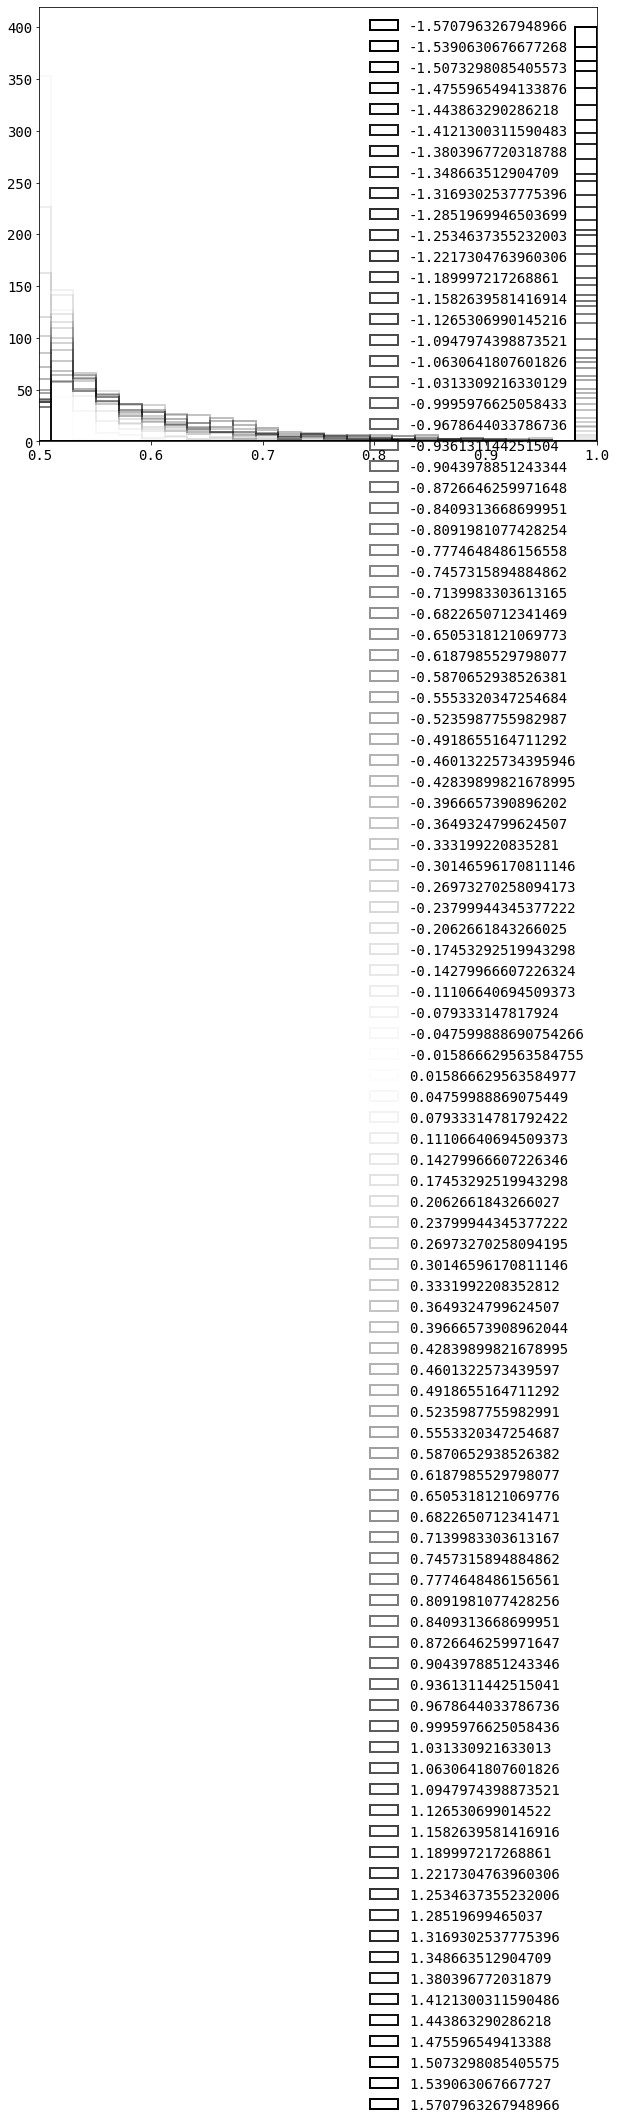

In [5]:
plt.figure(figsize=(10,8))
for t in theta:
    dl = np.vectorize(daylength)(t, i)
    plt.hist(dl, bins=np.linspace(0,1,50), histtype="step", linewidth=2, 
             label=t, edgecolor="k", alpha=np.abs(t)/np.pi*2)
# plt.yscale("log")
plt.xlim(0.5,1)
plt.legend()

In [24]:
from scipy.optimize import curve_fit
from scipy.stats import skew, kurtosis

In [63]:
theta = np.linspace(0, np.pi/2, 400)
i = np.arccos(np.random.rand(3000))
# print(i)
ts = []
ms = []
for t in theta:
    dls = []
    for i_ in i:
        dls.append(1-daylength(t, i_))
#         dls.append(1-daylength(-t, i_))
#         for j in range(20):
#             dls.append(0.1)
    ts.append(np.std(np.array(dls)))
    ms.append(np.mean(np.array(dls)))
    
# # fit power law

# x, y = theta, np.array(ts)
# def powerlaw(x,a,b):
#     return a*x**b
# pars, cov = curve_fit(f=powerlaw, xdata=x, ydata=y, p0=[.1, .7])
    

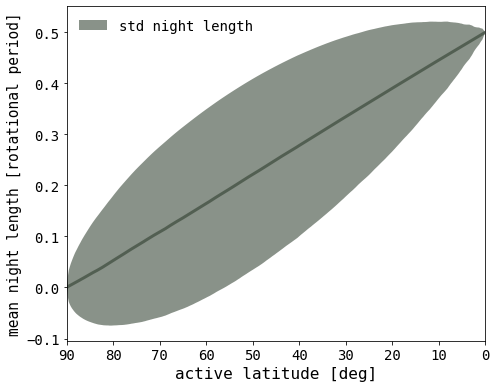

In [81]:
plt.figure(figsize=(7,5.5))
plt.plot(theta*180/np.pi, ms, linewidth=3,)
plt.fill_between(theta*180/np.pi, np.array(ts)+np.array(ms), 
                 np.array(ms)-np.array(ts), linewidth=3,
                 label="std night length")
# plt.plot(theta*180/np.pi, powerlaw(x,*pars), linewidth=3, 
#          linestyle="dotted", label=rf"1-{pars[0]:.3f}x^{pars[1]:.3f}")
# plt.yscale("log")
# plt.xscale("log")
plt.xlim(90,0)
plt.legend(loc=2)
plt.xlabel("active latitude [deg]")
plt.ylabel("mean night length [rotational period]",fontsize=14.5)
# plt.title("20 flares during daytime + 1 night")
plt.savefig("plots/2022_03_03_night_length_and_std.png",dpi=300)

In [10]:
pars

array([0.3665809 , 0.72086482])

(0.0, 2000.0)

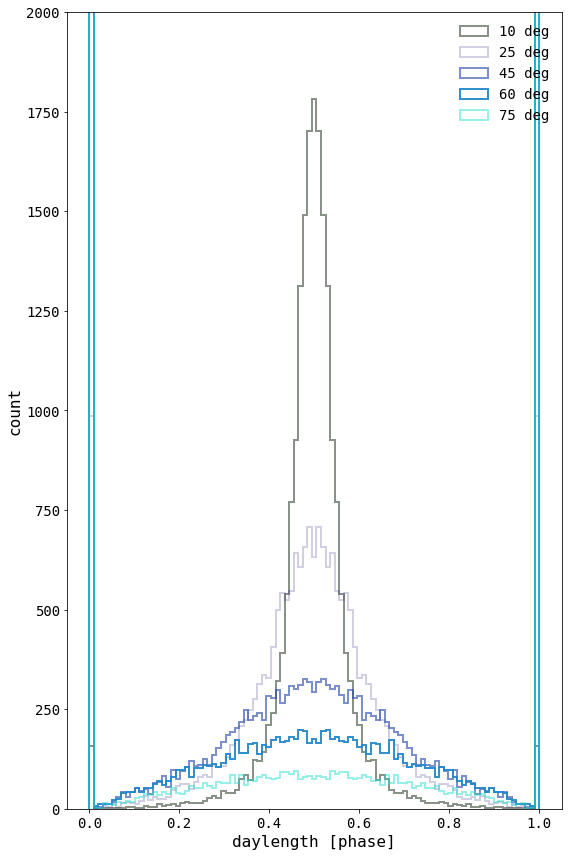

In [72]:
theta = np.array([10,25,45,60,75])/180*np.pi
i = np.arccos(np.random.rand(10000))
plt.figure(figsize=(8,12))
for t in theta:
    dls = []
    for i_ in i:
        dls.append(daylength(t, i_))
        dls.append(daylength(-t, i_))
    dl = plt.hist(np.array(dls), bins=np.linspace(0,1,100),
                  label=f"{t*180/np.pi:.0f} deg",
                 histtype="step",linewidth=2)
   

plt.legend(frameon=False)
plt.xlabel("daylength [phase]")
plt.ylabel("count")
plt.ylim(0,2000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'kurtosis daylength [orbital period]')

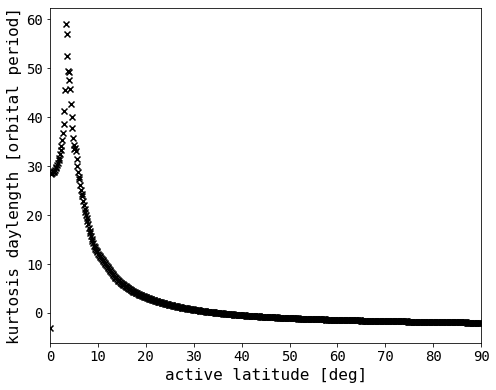

In [159]:
theta = np.linspace(0, np.pi/2, 600)
i = np.arccos(np.random.rand(500))
plt.figure(figsize=(7,5.5))
ts = []
for t in theta:
    dls = []
    for i_ in i:
        dls.append(daylength(t, i_))
        dls.append(daylength(-t, i_))
    ts.append(kurtosis(np.array(dls)))
plt.scatter(theta*180/np.pi, np.array(ts),c="k")
# plt.yscale("log")
plt.xlim(0,90)
plt.legend()
plt.xlabel("active latitude [deg]")
plt.ylabel("kurtosis daylength [orbital period]")

In [6]:
dl

array([0.5       , 0.5000028 , 0.5000112 , 0.50002525, 0.500045  ,
       0.50007052, 0.50010193, 0.50013936, 0.50018297, 0.50023294,
       0.50028951, 0.50035292, 0.50042347, 0.50050151, 0.50058742,
       0.50068166, 0.50078471, 0.50089717, 0.5010197 , 0.50115304,
       0.50129806, 0.50145575, 0.50162726, 0.5018139 , 0.50201722,
       0.502239  , 0.50248135, 0.50274675, 0.50303814, 0.50335906,
       0.50371376, 0.50410743, 0.50454643, 0.50503868, 0.50559415,
       0.50622556, 0.5069494 , 0.50778744, 0.50876905, 0.50993478,
       0.51134229, 0.5130764 , 0.51526727, 0.51812537, 0.52201476,
       0.5276248 , 0.5364392 , 0.55235125, 0.59002223, 0.82656088,
       0.1624015 , 0.40418   , 0.44201941, 0.45798471, 0.46683109,
       0.47246841, 0.47638519, 0.47927264, 0.48149566, 0.48326515,
       0.48471151, 0.48591974, 0.48694759, 0.48783573, 0.48861358,
       0.489303  , 0.48992053, 0.49047897, 0.49098836, 0.49145667,
       0.49189035, 0.49229467, 0.49267396, 0.49303183, 0.49337

In [16]:
pars

array([0.36673821, 0.75839515])

array([0.        , 0.00684787, 0.01158391, 0.0157544 , 0.01959543,
       0.02320871, 0.02665027, 0.02995531, 0.03314779, 0.03624502,
       0.03926003, 0.04220294, 0.04508181, 0.04790322, 0.05067263,
       0.05339461, 0.05607306, 0.05871134, 0.06131237, 0.06387869,
       0.06641258, 0.06891602, 0.07139082, 0.07383857, 0.07626074,
       0.07865864, 0.08103347, 0.08338632, 0.08571822, 0.08803007,
       0.09032274, 0.09259701, 0.09485363, 0.09709326, 0.09931656,
       0.10152412, 0.10371648, 0.10589418, 0.1080577 , 0.11020751,
       0.11234404, 0.1144677 , 0.11657888, 0.11867795, 0.12076526,
       0.12284114, 0.12490591, 0.12695985, 0.12900326, 0.13103642,
       0.13305957, 0.13507297, 0.13707685, 0.13907144, 0.14105696,
       0.14303362, 0.14500161, 0.14696113, 0.14891236, 0.15085547,
       0.15279065, 0.15471805, 0.15663783, 0.15855014, 0.16045514,
       0.16235295, 0.16424373, 0.16612759, 0.16800468, 0.1698751 ,
       0.17173899, 0.17359645, 0.17544761, 0.17729256, 0.17913